In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#Loading Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Arcadian/Fraud.csv')
last_column = df.pop('isFraud')
df.insert(10, 'isFraud', last_column)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [123]:
#Checking DataFrame Shape
df.shape

(6362620, 11)

In [124]:
#Checking Data Type
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
isFraud             int64
dtype: object

In [125]:
# Dropping irrelevant columns (because these columns are not needed for ML modeling)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [126]:
# Changing data type of Step column because it's necessary for checking correlation.
df['step'] = pd.to_numeric(df['step'], errors='coerce').fillna(0).astype(int)
print(df.dtypes)
df.head(3)


step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
isFraud             int64
dtype: object


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1


In [127]:
#Checking Duplicates
df.duplicated().sum()

543

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
#Checking Null Values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

In [130]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')

In [131]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [132]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [133]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362061
1         16
Name: count, dtype: int64

In [134]:
df['isFraud'].value_counts()

isFraud
0    6353880
1       8197
Name: count, dtype: int64

Dataset is highly unbalanced.



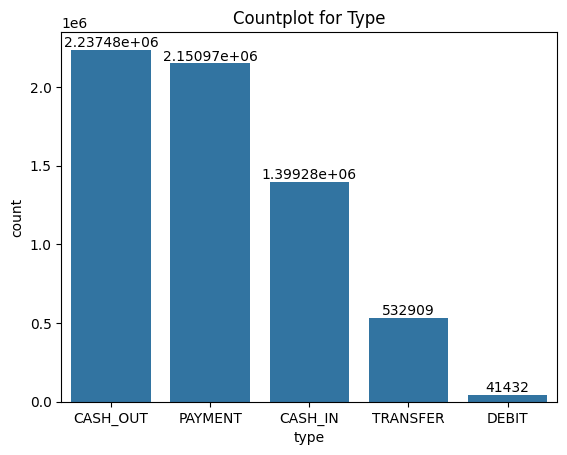

In [135]:
#Checking Payment Type Count
ax=sns.countplot(data=df,x='type',
              order=df['type'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.title('Countplot for Type')
plt.show()

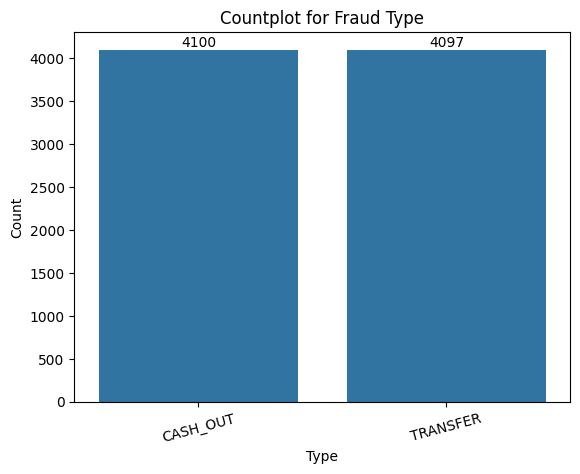

In [136]:
# Checking Fraud Cases Type Wise
df_fraud = df[df['isFraud'] == 1]

ax = sns.countplot(data=df_fraud, x='type',
                   order=df_fraud['type'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.title('Countplot for Fraud Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

Inference: Both cash-out and transfer frauds occur.








In [137]:
df.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1


In [138]:
#Selecting Numeric columns for Checking Outliers and Statistical Properties.
corr_cols=df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
Cat_Cols=df[['type','isFlaggedFraud','isFraud']]


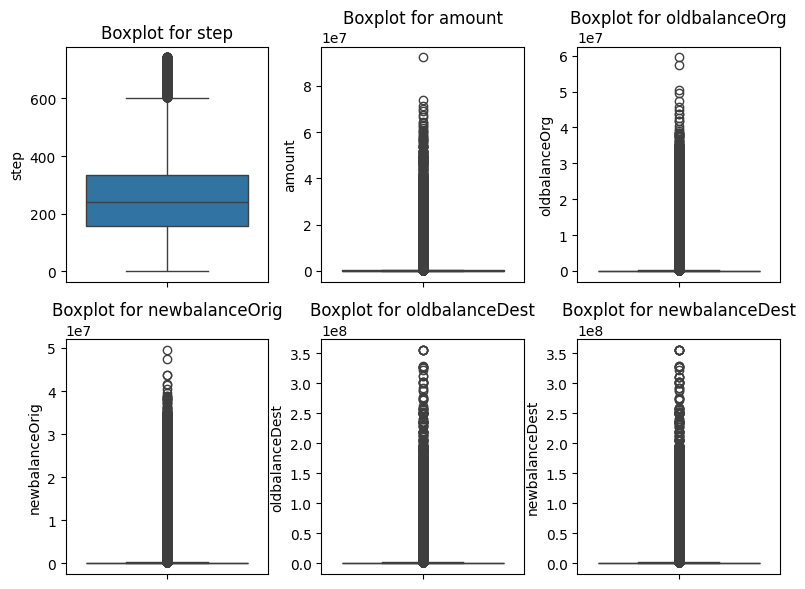

In [139]:
plt.figure(figsize=(8, 6))
for i in range(len(corr_cols.columns)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=corr_cols.iloc[:, i])
    plt.title(f'Boxplot for {corr_cols.columns[i]}')
plt.tight_layout()
plt.show()

In [140]:
corr_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362077.0,2.433995e+02,1.423323e+02,1.0,156.00,239.00,335.00,7.430000e+02
amount,6362077.0,1.798531e+05,6.036937e+05,0.0,13394.07,74893.34,208732.96,9.244552e+07
oldbalanceOrg,6362077.0,8.339307e+05,2.888322e+06,0.0,0.00,14218.00,107326.00,5.958504e+07
newbalanceOrig,6362077.0,8.551867e+05,2.924163e+06,0.0,0.00,0.00,144292.52,4.958504e+07
oldbalanceDest,6362077.0,1.100796e+06,3.399310e+06,0.0,0.00,132783.41,943171.77,3.560159e+08
newbalanceDest,6362077.0,1.225077e+06,3.674244e+06,0.0,0.00,214738.54,1112050.52,3.561793e+08


In [141]:
# Checking Values Beyond 99th Percentile
percentiles = [0.99]
percentile_values = corr_cols.describe(percentiles=percentiles).T

# Extracting the 99th percentile values for each column
percentile_99 = percentile_values['99%']

# Create a boolean dataframe where each cell is True if the value is above the 99th percentile for that column.
above_99th = corr_cols.apply(lambda x: x > percentile_99[x.name])

# Calculate the number of rows that have at least one value above the 99th percentile
num_rows_above_99th = above_99th.any(axis=1).sum()
print("Number of rows with at least one value above the 99th percentile:", num_rows_above_99th)
print("Shape of the filtered dataframe:", (num_rows_above_99th, corr_cols.shape[1]))
print('Percentage of Outliers %',243714*100/6362620)


Number of rows with at least one value above the 99th percentile: 243697
Shape of the filtered dataframe: (243697, 6)
Percentage of Outliers % 3.830403198682304


In [142]:
#Replacing Values above 99th percentile with 99th percentile.
filtered_df = corr_cols.where(corr_cols <= percentile_99, percentile_99, axis=1)
print(filtered_df.shape)
filtered_df.head()

(6362077, 6)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


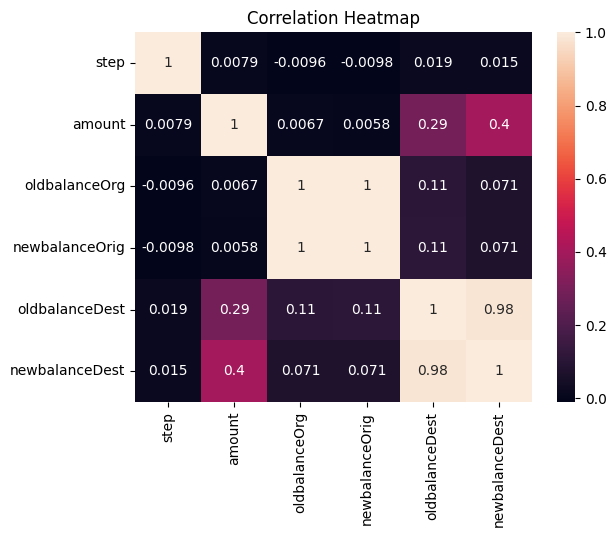

In [143]:
# Plotting the heatmap
corr = filtered_df.corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


oldbalanceOrg and newbalanceOrig: These have a perfect correlation of 1, indicating that they are essentially the same or linearly dependent.
oldbalanceDest and newbalanceDest: These have a very high correlation of 0.98, indicating a strong linear relationship.

In [144]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362077.0,2.432837e+02,1.419676e+02,1.0,156.00,239.00,335.00,6.810000e+02
amount,6362077.0,1.568314e+05,2.433606e+05,0.0,13394.07,74893.34,208732.96,1.615849e+06
oldbalanceOrg,6362077.0,7.808105e+05,2.509345e+06,0.0,0.00,14218.00,107326.00,1.602839e+07
newbalanceOrig,6362077.0,8.020499e+05,2.547940e+06,0.0,0.00,0.00,144292.52,1.617631e+07
oldbalanceDest,6362077.0,9.960610e+05,2.093038e+06,0.0,0.00,132783.41,943171.77,1.237256e+07
newbalanceDest,6362077.0,1.107487e+06,2.221213e+06,0.0,0.00,214738.54,1112050.52,1.313826e+07


In [145]:
#Merge DF
df1 = pd.concat([filtered_df, Cat_Cols], axis=1)

# Print the shape of the merged dataframe
print(df1.shape)

# Display the first few rows of the merged dataframe
df1.head()

(6362077, 9)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFlaggedFraud,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,PAYMENT,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,PAYMENT,0,0
2,1,181.00,181.0,0.00,0.0,0.0,TRANSFER,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,CASH_OUT,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,PAYMENT,0,0


In [146]:
# Selecting samples
nonFraudT = df1[df1['isFraud'] == 0].sample(n=8197)
FraudT = df1[df1['isFraud'] == 1]

# Concatenating balanced dataset
df_balanced = pd.concat([nonFraudT, FraudT], axis=0).reset_index(drop=True)


In [147]:
#Checking Values after Sampling
df_balanced['isFraud'].value_counts()

isFraud
0    8197
1    8197
Name: count, dtype: int64

In [148]:
#Displaying Balance Df
df_balanced.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFlaggedFraud,isFraud
0,303,312920.97,6.617283e+05,9.746493e+05,1761276.68,1448355.71,CASH_IN,0,0
1,158,132361.47,0.000000e+00,0.000000e+00,160386.28,292747.76,CASH_OUT,0,0
2,16,101266.94,0.000000e+00,0.000000e+00,487478.12,588745.07,CASH_OUT,0,0
3,403,26635.72,1.602839e+07,1.617631e+07,4741862.01,4715226.29,CASH_IN,0,0
4,158,120410.52,3.104473e+05,1.900368e+05,796344.86,2110373.56,CASH_OUT,0,0


In [149]:
#Encoding Categorical Column
from sklearn.preprocessing import LabelEncoder

# Encoding type column
lb = LabelEncoder()
df_balanced['type']=lb.fit_transform(df_balanced['type'])
df_balanced['isFraud']=lb.fit_transform(df_balanced['isFraud'])


In [150]:
#Selecting x and y
x=df_balanced.drop('isFraud',axis=1)
y=df_balanced['isFraud']
print(x.shape)
print(y.shape)

(16394, 8)
(16394,)


In [151]:
#Splitting Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=48)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(11475, 8)
(4919, 8)
(11475,)
(4919,)


In [152]:
#Creating Function to Evaluation
from sklearn.metrics import *

def eval_model(model,x_train,x_test,y_train,y_test,mname):
  model.fit(x_train,y_train)
  ypred=model.predict(x_test)
  cm=confusion_matrix(y_test,ypred)
  train_acc=model.score(x_train,y_train)
  test_acc=model.score(x_test,y_test)
  precision = precision_score(y_test, ypred)
  recall = recall_score(y_test, ypred)

  res_df = pd.DataFrame({'Train_Acc': [train_acc], 'Test_Acc': [test_acc], 'Precision': [precision], 'Recall': [recall]}, index=[mname])

  return ypred, cm, res_df

In [153]:
#Import the ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [154]:
#Logistic Regression
LogReg=LogisticRegression(max_iter=10000)
ypred_LR,Cm_LR,LR_Res_df=eval_model(LogReg,x_train,x_test,y_train,y_test,'LogReg')

In [155]:
print(Cm_LR)
print(LR_Res_df)

[[2199  236]
 [ 295 2189]]
        Train_Acc  Test_Acc  Precision   Recall
LogReg   0.893159  0.892051    0.90268  0.88124


In [156]:
#KNN
KNN=KNeighborsClassifier(n_neighbors=4)
ypred_KNN,Cm_KNN,KNN_Res_df=eval_model(KNN,x_train,x_test,y_train,y_test,'KNN')

In [157]:
print(Cm_KNN)
print(KNN_Res_df)

[[2347   88]
 [ 125 2359]]
     Train_Acc  Test_Acc  Precision    Recall
KNN     0.9722  0.956699   0.964038  0.949678


In [158]:
#DecisionTree
DT=DecisionTreeClassifier(criterion='gini',max_depth=80,min_samples_split=15)
ypred_DT,Cm_DT,DT_Res_df=eval_model(DT,x_train,x_test,y_train,y_test,'DT')


In [159]:
print(Cm_DT)
print(DT_Res_df)

[[2404   31]
 [  27 2457]]
    Train_Acc  Test_Acc  Precision   Recall
DT    0.99695  0.988209    0.98754  0.98913


In [160]:
#Bagging
Bagg=BaggingClassifier(n_estimators=40)
ypred_Bagg,Cm_Bagg,Bagg_Res_df=eval_model(Bagg,x_train,x_test,y_train,y_test,'Bagg')



In [161]:
print(Cm_Bagg)
print(Bagg_Res_df)

[[2408   27]
 [  15 2469]]
      Train_Acc  Test_Acc  Precision    Recall
Bagg        1.0  0.991462   0.989183  0.993961


In [162]:
#Adaboost
Adb=AdaBoostClassifier(n_estimators=120)
ypred_Adb,Cm_Adb,Adb_Res_df=eval_model(Adb,x_train,x_test,y_train,y_test,'Adb')



In [163]:
print(Cm_Adb)
print(Adb_Res_df)

[[2370   65]
 [  46 2438]]
     Train_Acc  Test_Acc  Precision    Recall
Adb   0.978388  0.977434   0.974031  0.981481


In [164]:
#RandomForest
RF=RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=45,min_samples_split=115)
ypred_RF,Cm_RF,RF_Res_df=eval_model(RF,x_train,x_test,y_train,y_test,'RF')



In [165]:
print(Cm_RF)
print(RF_Res_df)

[[2388   47]
 [  22 2462]]
    Train_Acc  Test_Acc  Precision    Recall
RF   0.988845  0.985973   0.981267  0.991143


In [166]:
#Combining All Result
All_Res=pd.concat([LR_Res_df,KNN_Res_df,DT_Res_df,Bagg_Res_df,Adb_Res_df,RF_Res_df])
All_Res

,Train_Acc,Test_Acc,Precision,Recall
LogReg,0.893159,0.892051,0.902680,0.881240
KNN,0.972200,0.956699,0.964038,0.949678
DT,0.996950,0.988209,0.987540,0.989130
Bagg,1.000000,0.991462,0.989183,0.993961
Adb,0.978388,0.977434,0.974031,0.981481
RF,0.988845,0.985973,0.981267,0.991143


#Best Model is Bagging Classifier



In [167]:
Bagg_Final=Bagg

In [168]:
Bagg.fit(x,y)

BaggingClassifier(n_estimators=40)

In [169]:
Prediction=Bagg.predict(x_test)
print(Prediction)

[1 0 0 ... 0 0 0]


PCA

In [170]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
print(x_sc.shape)

(16394, 8)


In [171]:
from sklearn.decomposition import PCA

In [172]:
pca=PCA()
x_res=pca.fit_transform(x_sc)
print(x_res.shape)

(16394, 8)


In [173]:
eig_val=pca.explained_variance_
eig_vec=pca.components_
print('Eigen Values\n',eig_val)
eig_val_cumsum=pca.explained_variance_ratio_
print(eig_val_cumsum)

Eigen Values
 [2.24969591 1.66891127 1.33935194 0.98010248 0.88545156 0.66716798
 0.15603973 0.05376715]
[0.28119484 0.20860118 0.16740878 0.12250534 0.11067469 0.08339091
 0.01950378 0.00672048]


In [174]:
#For Knowing Percentage
total_eig_val=sum(eig_val)
print('Total',total_eig_val)
var_eig_val=[((i/total_eig_val)*100) for i in eig_val]
print(var_eig_val)
cum_var_eig_val=np.cumsum(var_eig_val)
print("Cum_var_Eig_val/n",cum_var_eig_val)

Total 8.000488013176358
[28.119483537114608, 20.860118353665428, 16.740877992792498, 12.250533636662482, 11.067469381362024, 8.339091068171482, 1.9503776884690374, 0.672048341762434]
Cum_var_Eig_val/n [ 28.11948354  48.97960189  65.72047988  77.97101352  89.0384829
  97.37757397  99.32795166 100.        ]


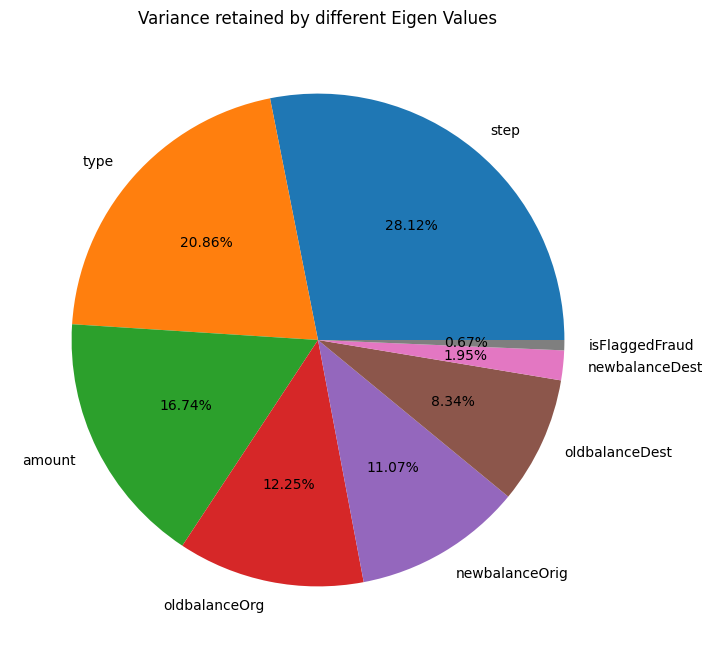

In [175]:
#Plotting Result
plt.figure(figsize=[8,8])
plt.pie(x=var_eig_val,labels=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud',],
        autopct='%.2f%%')
plt.title('Variance retained by different Eigen Values')
plt.show()

We emphatically observe that the pivotal components of this dataset are: step, type, amount, oldbalanceOrg, and newbalanceOrig. These constituents collectively encapsulate 89.15% of the variance, underscoring their paramount importance in discerning the authenticity of a transaction, distinguishing between fraudulent and non-fraudulent activities. These key factors are of utmost significance because they serve as the cornerstone for accurate detection and prevention of fraudulent behavior, thereby safeguarding the integrity and trustworthiness of financial systems and transactions.

In [176]:
#Validation
print(x_sc.shape)
print(eig_vec.shape)

(16394, 8)
(8, 8)


In [177]:
pc_res=np.dot(x_sc,eig_vec.T)
print(pc_res)
print(x_res)
print(pc_res.shape)
print(x_res.shape)

[[ 0.66038765 -0.71258931  0.77664972 ... -0.67736561 -0.38169658
  -0.08855007]
 [-0.58250228 -0.48092423  0.96339342 ... -0.59800172  0.01781328
  -0.03991715]
 [-0.47458226 -0.75021485  1.2921111  ... -0.54976605  0.03081751
  -0.06430464]
 ...
 [ 2.69631415  0.93159265 -2.30844623 ... -1.39858122  1.20244237
   0.2869834 ]
 [-0.6794387   1.05502552 -1.8774887  ...  0.49982911 -0.28930623
   0.08103041]
 [ 3.1097709  -2.325265   -1.9642608  ...  0.4754575  -0.43264779
  -0.05575792]]
[[ 0.66038765 -0.71258931  0.77664972 ... -0.67736561 -0.38169658
  -0.08855007]
 [-0.58250228 -0.48092423  0.96339342 ... -0.59800172  0.01781328
  -0.03991715]
 [-0.47458226 -0.75021485  1.2921111  ... -0.54976605  0.03081751
  -0.06430464]
 ...
 [ 2.69631415  0.93159265 -2.30844623 ... -1.39858122  1.20244237
   0.2869834 ]
 [-0.6794387   1.05502552 -1.8774887  ...  0.49982911 -0.28930623
   0.08103041]
 [ 3.1097709  -2.325265   -1.9642608  ...  0.4754575  -0.43264779
  -0.05575792]]
(16394, 8)
(1639

The company should focus on preventing fraud by securing key data elements like step, type, amount, oldbalanceOrg, and newbalanceOrig. This involves adding strong security measures such as authentication, encryption, and access controls. They should also use advanced fraud detection systems and regularly update security measures to stay ahead of new threats. By doing this, the company can protect its financial transactions from fraudulent activities.